<a href="https://colab.research.google.com/github/obinnachike/Stroke_Prediction/blob/main/stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

In [ ]:
train = pd.read_csv('train_2v.csv')
test = pd.read_csv('test_2v.csv')
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [ ]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [ ]:
train.shape

(43400, 12)

In [ ]:
test.shape

(18601, 11)

In [ ]:
train_missing_values = train.isnull().sum()
train_missing_values

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,1462


In [ ]:
test_missing_values = test.isnull().sum()
test_missing_values

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,591


<Axes: >

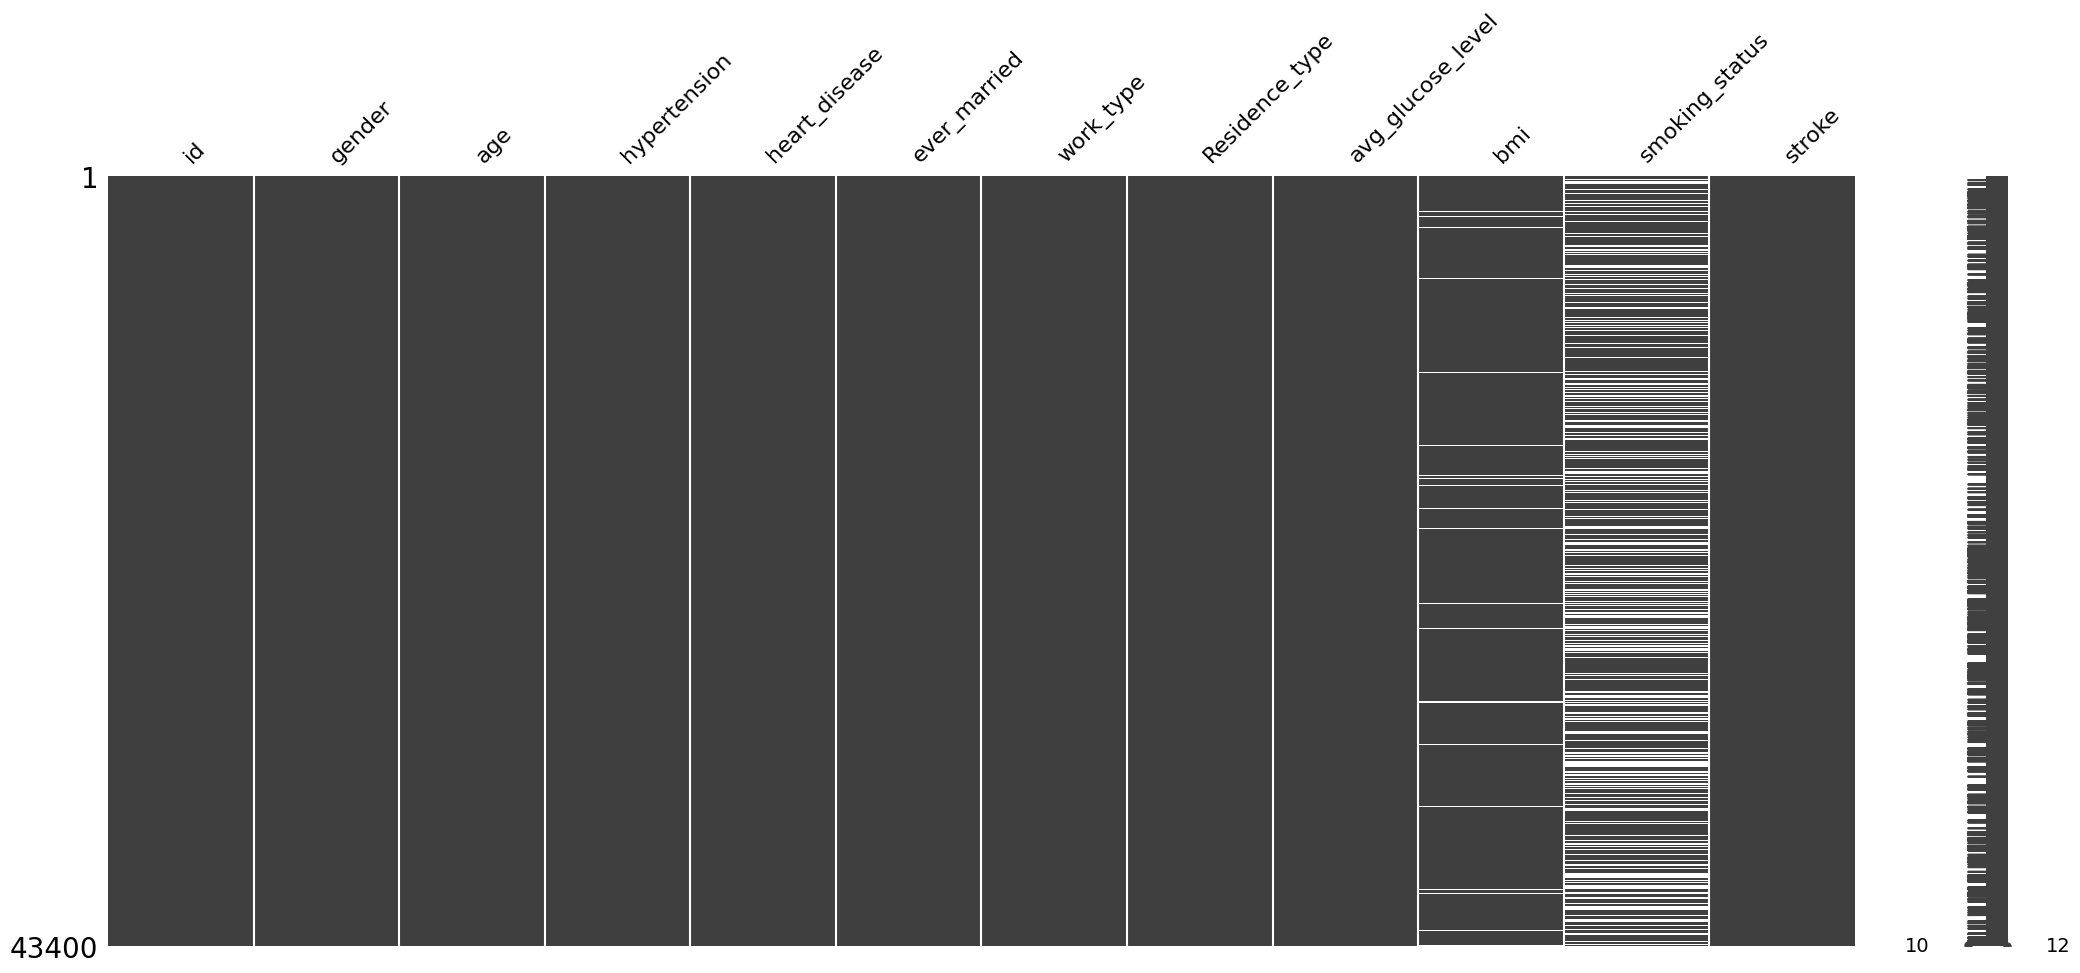

In [ ]:
ms.matrix(train)

<Axes: >

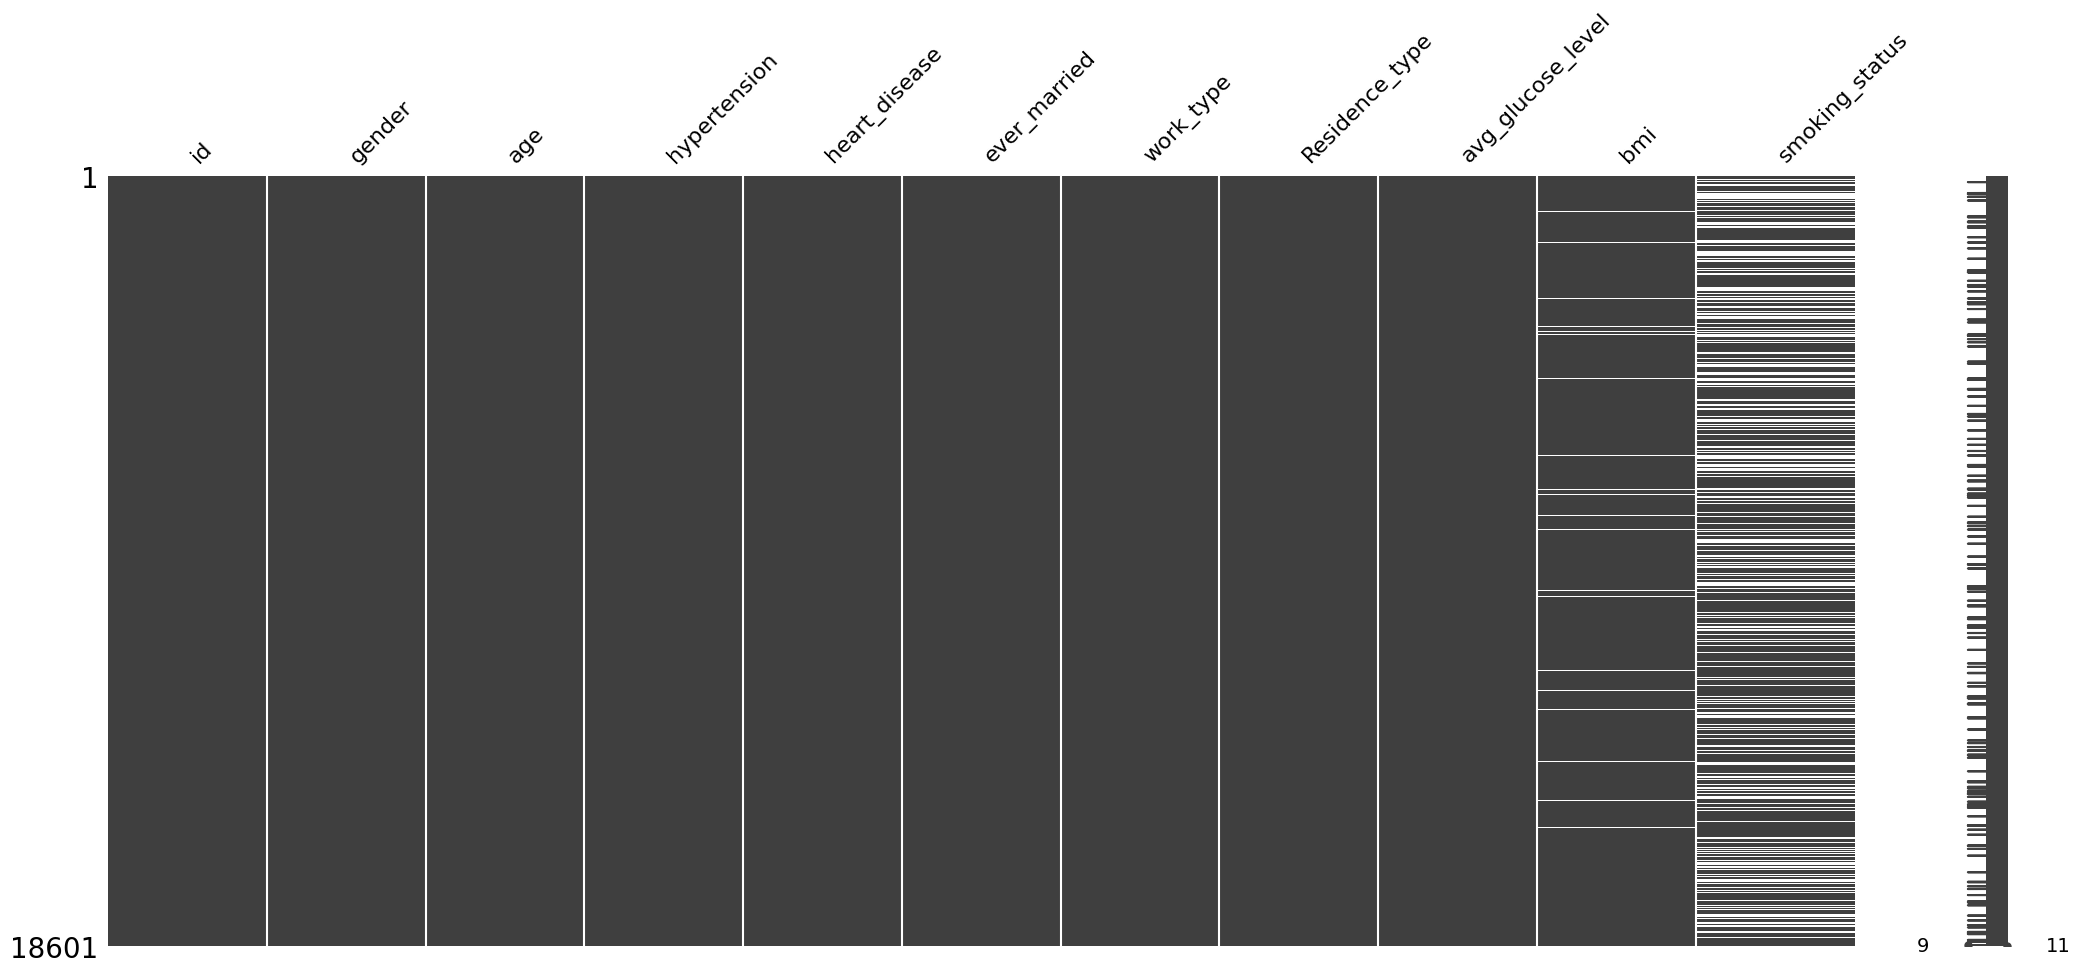

In [ ]:
ms.matrix(test)

In [ ]:
train_data = train.dropna(axis = 0, how = 'any')
test_data = test.dropna(axis = 0, how = 'any')
print('train data shape: {}' .format(train_data.shape))
print('test data shape: {}' .format(test_data.shape))

train data shape: (29072, 12)
test data shape: (12423, 11)


<Axes: >

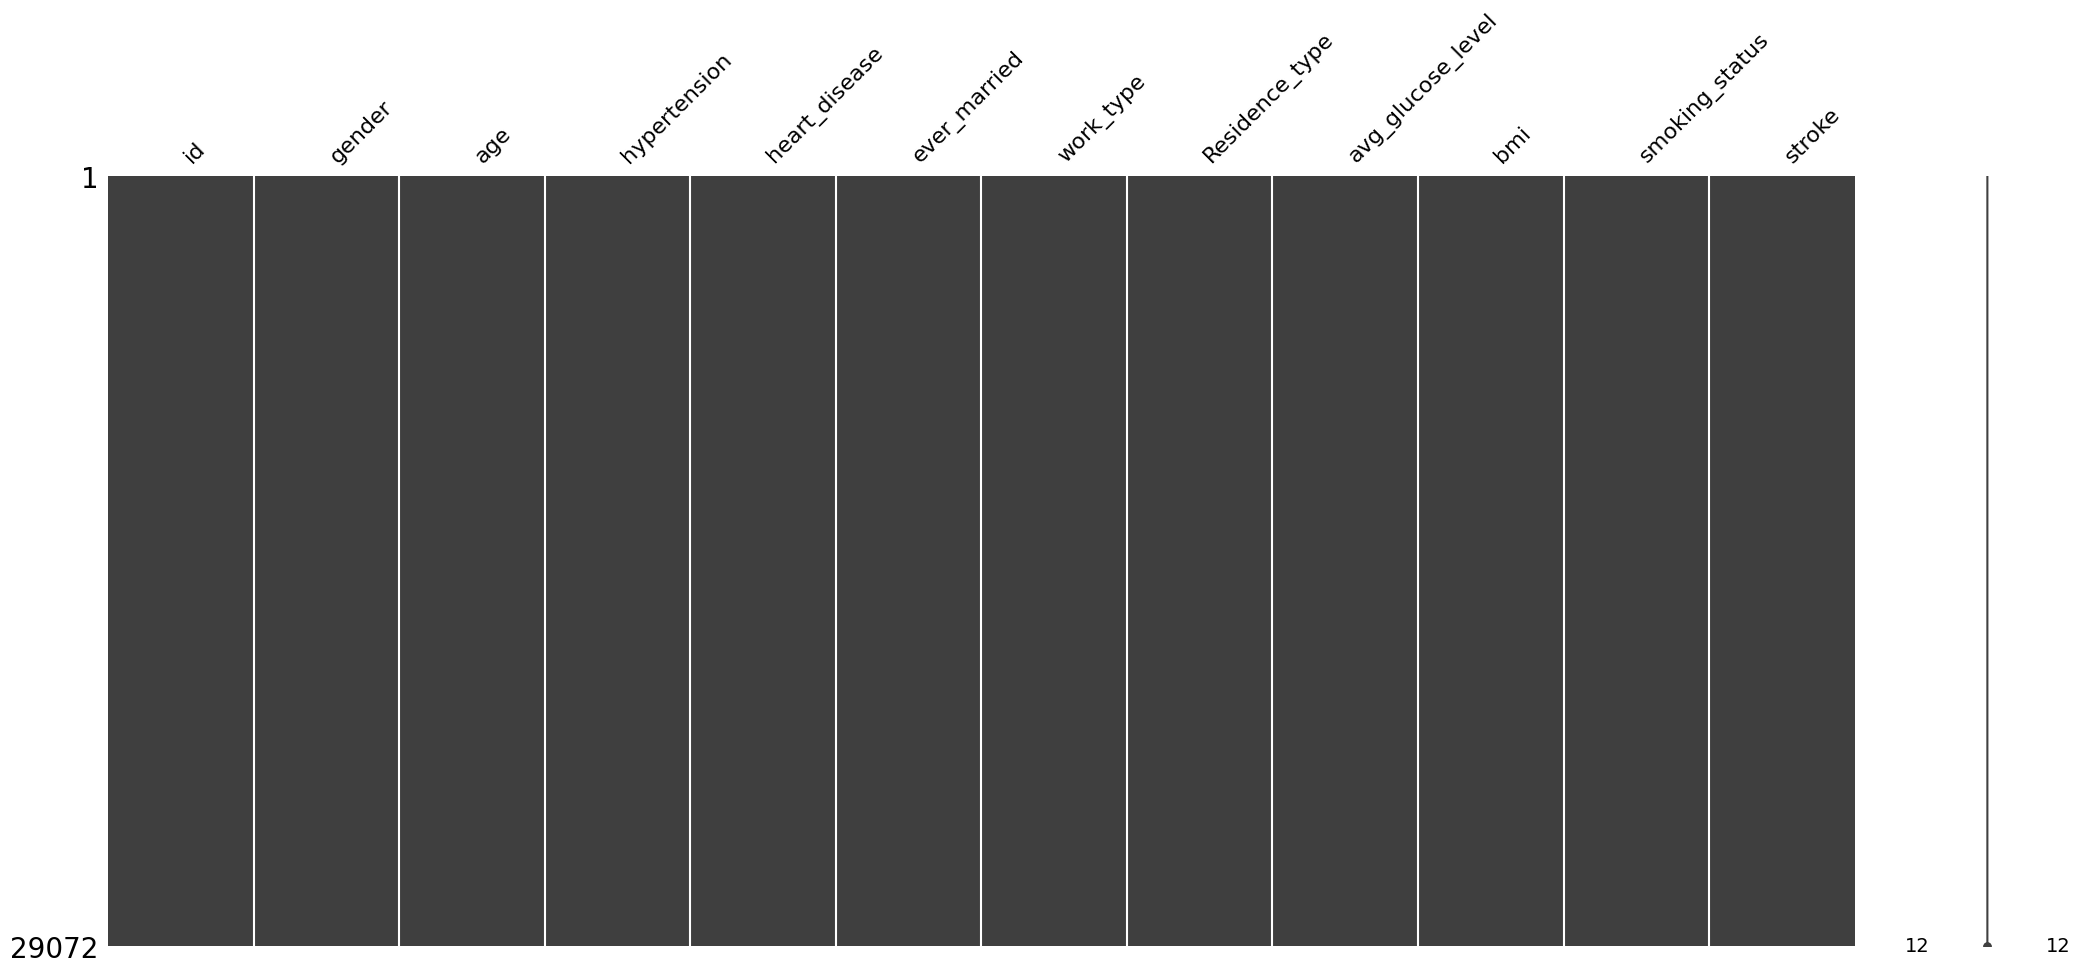

In [ ]:
ms.matrix(train_data)

<Axes: >

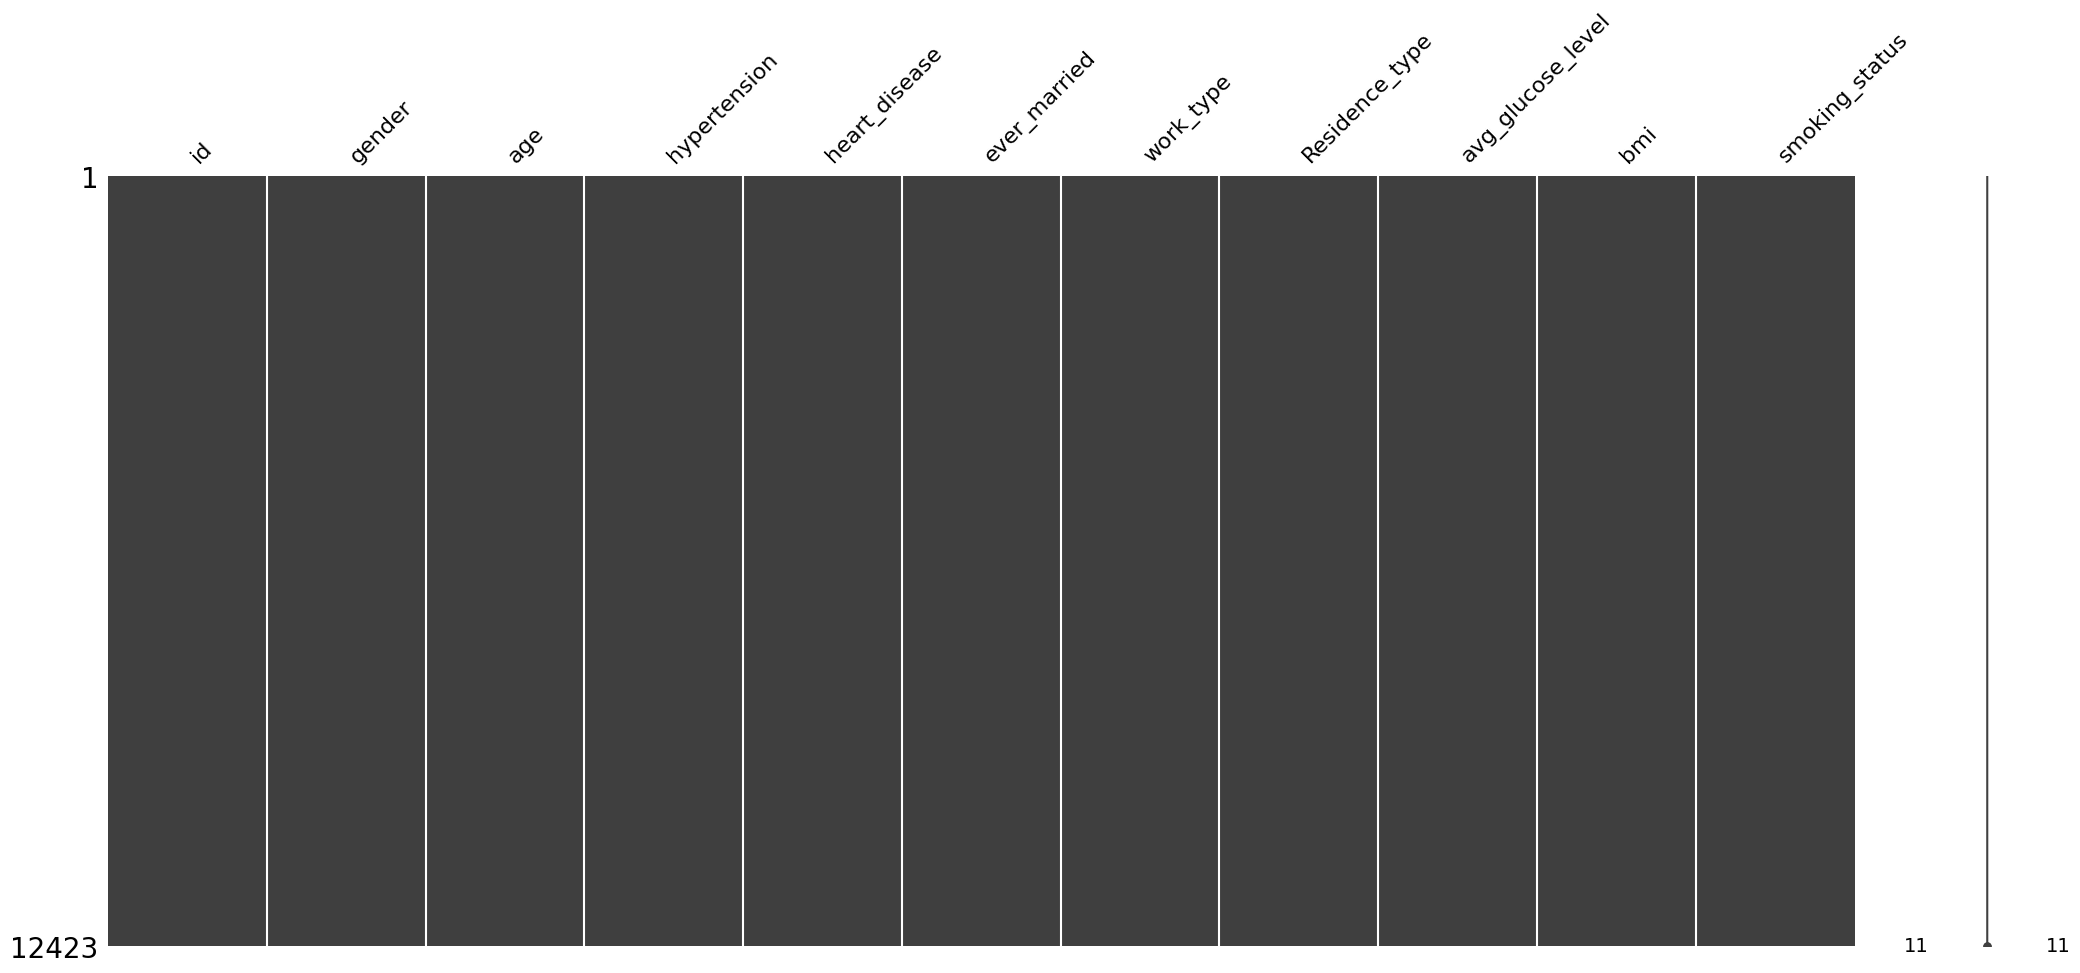

In [ ]:
ms.matrix(test_data)

In [ ]:
train_data['stroke'].value_counts()

,count
stroke,
0,28524
1,548


<function matplotlib.pyplot.show(close=None, block=None)>

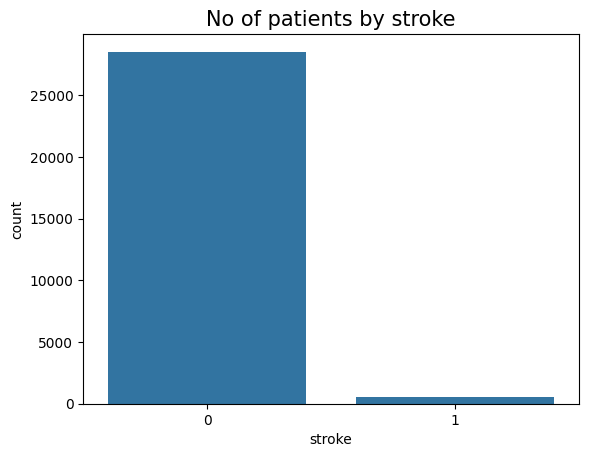

In [ ]:
sns.countplot(x=train_data['stroke'])
plt.title('No of patients by stroke', fontsize = 15)
plt.show

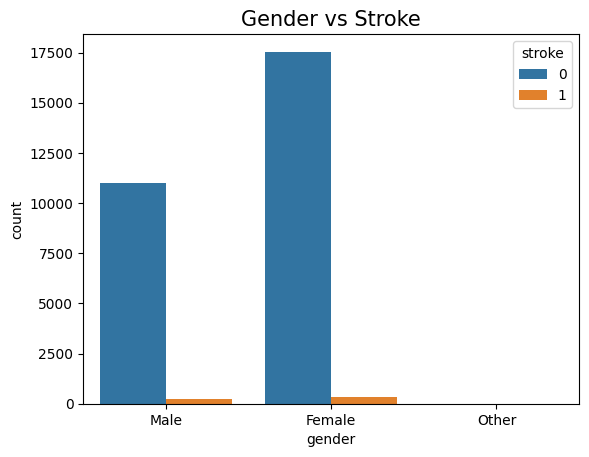

In [ ]:
sns.countplot(x = train_data['gender'], hue= train_data['stroke'])
plt.title('Gender vs Stroke', fontsize = 15)
plt.show()

In [ ]:
train_data.groupby(['gender'])['stroke'].value_counts()

gender  stroke
Female  0         17539
        1           313
Male    0         10978
        1           235
Other   0             7
Name: count, dtype: int64

In [ ]:
train_data['smoking_status'].value_counts()

,count
smoking_status,
never smoked,15747
formerly smoked,7099
smokes,6226


In [ ]:
train_data.groupby(['gender'])['smoking_status'].value_counts()

gender  smoking_status 
Female  never smoked       10406
        formerly smoked     3926
        smokes              3520
Male    never smoked        5340
        formerly smoked     3167
        smokes              2706
Other   formerly smoked        6
        never smoked           1
Name: count, dtype: int64

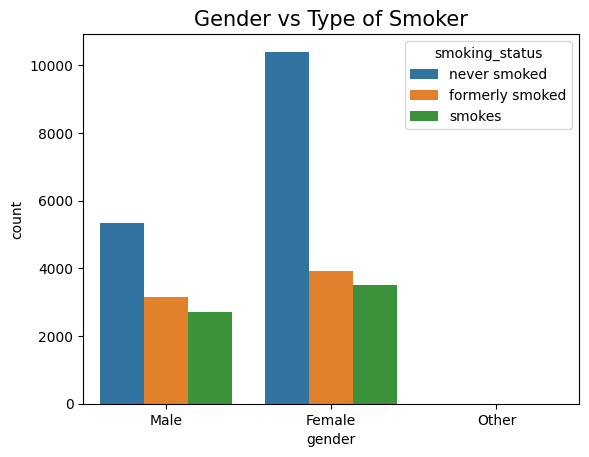

In [ ]:
sns.countplot(x = train_data['gender'], hue= train_data['smoking_status'])
plt.title('Gender vs Type of Smoker', fontsize = 15)
plt.show()

In [ ]:
str_train_data = train_data.select_dtypes(include = ['object'])
str_test_data = test_data.select_dtypes(include = ['object'])

In [ ]:
int_train_data = train_data.select_dtypes(include = ['integer', 'float'])
int_test_data = test_data.select_dtypes(include = ['integer', 'float'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()
features = str_train_data.apply(label.fit_transform)
features = features.join(int_train_data)
features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2,0
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9,0
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7,0
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0,0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3,0


In [ ]:
int_test = str_train_data.apply(label.fit_transform)
int_test = int_test.join(int_train_data)
int_test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2,0
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9,0
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7,0
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0,0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3,0


# MODELING

In [ ]:
Xtrain = features.drop(["stroke"], axis = 1)
Xtrain.shape

(29072, 11)

In [ ]:
ytrain = features["stroke"]
ytrain.shape

(29072,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size = 0.2)

In [ ]:
x_train.shape

(23257, 11)

In [ ]:
y_train.shape

(23257,)

In [ ]:
x_train.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
11648,0,1,2,0,1,66509,68.0,0,0,100.65,23.1
3513,1,0,2,0,2,7730,31.0,0,0,94.96,54.7
24669,1,0,2,0,2,58213,27.0,0,0,68.60,28.0
12327,1,1,3,1,0,12145,68.0,0,0,90.77,33.7
1853,1,1,2,1,2,65109,47.0,0,0,71.42,34.9


In [ ]:
y_train.head()

,stroke
11648,0
3513,0
24669,0
12327,0
1853,0


Model Building using GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [ ]:
predict = model.predict(x_test)

In [ ]:
test_score = model.score(x_test, y_test)
print("NBtest_score:", test_score)

NBtest_score: 0.9750644883920895


CONFUSION MATRIX

In [ ]:
nb_conf_mtr = pd.crosstab(y_test, predict)
nb_conf_mtr

col_0,0,1
stroke,,
0,5669,44
1,101,1


In [ ]:
from sklearn.metrics import classification_report


In [ ]:
nbreport = classification_report(y_test, predict)
nbreport

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.99      5713\n           1       0.02      0.01      0.01       102\n\n    accuracy                           0.98      5815\n   macro avg       0.50      0.50      0.50      5815\nweighted avg       0.97      0.98      0.97      5815\n'

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_predict = dt_model.predict(x_test)

In [ ]:
dt_score = dt_model.score(x_test, y_test)
print("The Decision Tree Test Score is:", dt_score)

The Decision Tree Test Score is: 0.9583834909716251


In [ ]:
# REPORT

DT_Report = classification_report(y_test, dt_predict)
DT_Report

'              precision    recall  f1-score   support\n\n           0       0.98      0.97      0.98      5713\n           1       0.04      0.06      0.05       102\n\n    accuracy                           0.96      5815\n   macro avg       0.51      0.52      0.51      5815\nweighted avg       0.97      0.96      0.96      5815\n'

In [ ]:
# Confusion Matrics

dt_conf_mtr = pd.crosstab(y_test, dt_predict)
dt_conf_mtr

col_0,0,1
stroke,,
0,5567,146
1,96,6


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators = 100)

In [ ]:
rfc_model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
rfc_predict = rfc_model.predict(x_test)

In [ ]:
rfc_score = rfc_model.score(x_test, y_test)
print("RFCtest_score:", rfc_score)

RFCtest_score: 0.9824591573516767


In [ ]:
rfc_conf_mtr = pd.crosstab(y_test, rfc_predict)
dt_conf_mtr

col_0,0,1
stroke,,
0,5567,146
1,96,6


In [ ]:
rfc_report = classification_report(y_test, rfc_predict)
rfc_report

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99      5713\n           1       0.00      0.00      0.00       102\n\n    accuracy                           0.98      5815\n   macro avg       0.49      0.50      0.50      5815\nweighted avg       0.97      0.98      0.97      5815\n'

USING NEURAL NETWORK

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier()

In [ ]:
mlp.fit(x_train, y_train)

MLPClassifier()

In [ ]:
mlp_predict = mlp.predict(x_test)

In [ ]:
mlp_score = mlp.score(x_test, y_test)
print("MLPtest_score:", mlp_score)

MLPtest_score: 0.9824591573516767


USING CROSS VALIDATION ACCURACIES

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x_train, y_train, cv = 20, scoring = "accuracy").mean()

np.float64(0.9748462712167921)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt_model, x_train, y_train, cv = 20, scoring = "accuracy").mean()

np.float64(0.9603126299572446)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc_model, x_train, y_train, cv = 20, scoring = "accuracy").mean()

np.float64(0.980823009517495)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, x_train, y_train, cv = 20, scoring = "accuracy").mean()

np.float64(0.9771251570586484)

APPLYING PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
model = GaussianNB()
model.fit(x_train_pca, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(x_test_pca)

In [ ]:
test_score = model.score(x_test_pca, y_test)
print("Test Score:", test_score)

Test Score: 0.9817712811693895


In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_pca, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt_model.predict(x_test_pca)

In [ ]:
test_score = dt_model.score(x_test_pca, y_test)
print("Test Score:", test_score)

Test Score: 0.9587274290627688


In [ ]:
dt_model = DecisionTreeClassifier(max_depth = 8)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [ ]:
predict = dt_model.predict(x_test)

In [ ]:
dt_score = dt_model.score(x_test, y_test)
print('Decision Tree test_score:', dt_score)

Decision Tree test_score: 0.9797076526225279


In [ ]:
rfc_model = RandomForestClassifier(n_estimators = 100)

In [ ]:
rfc_model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
predict_rfc = rfc_model.predict(x_test)

In [ ]:
print(pd.crosstab(y_test, predict_rfc))
print(classification_report(y_test, predict_rfc))

col_0      0
stroke      
0       5713
1        102
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5713
           1       0.00      0.00      0.00       102

    accuracy                           0.98      5815
   macro avg       0.49      0.50      0.50      5815
weighted avg       0.97      0.98      0.97      5815



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
rfc_model.score(x_test, y_test)

0.9824591573516767

In [ ]:
mlp_2 = MLPClassifier()

mlp_2.fit(x_train, y_train)

pred_mlp = mlp_2.predict(x_test)

mlp_2.score(x_test, y_test)

0.968701633705933

In [ ]:
cross_val_score(dt_model, x_train, y_train, cv = 20, scoring = "accuracy").mean()

np.float64(0.9779850392850113)

In [ ]:
cross_val_score(model, x_train, y_train, cv = 20, scoring = "accuracy").mean()

np.float64(0.9748462712167921)

In [ ]:
cross_val_score(rfc_model, x_train, y_train, cv = 20, scoring = "accuracy").mean()

np.float64(0.980823009517495)

In [ ]:
cross_val_score(mlp_2, x_train, y_train, cv = 20, scoring = "accuracy").mean()

np.float64(0.9806510404719232)